# Tidy Data
En esta seccion nos efocaremos al processo de limplieza y transformaccion para tener nuestro datos tidy

### Importando librerias

In [160]:
#Datos
import pandas as pd
import numpy as np
#Limpieza
import missingno as msno
#Archivos
import os, zipfile, requests, io
#plot
import seaborn as sns


## Descarga de datos

Los datos descargado para el proyecto son:
- 1.- worldbank - Niveles de educacion, Taza de alfabetizacion
- 2.- transparenciapresupuestaria - Presupuesto de la nacion

In [161]:
#Variables para descarga de datos

#Url de Educacion Banco de Mexico Informacion
url_carpeta_educacion = './raw_data/educacion/'
url_educacion_descarga = 'https://api.worldbank.org/v2/es/topic/4?downloadformat=csv'
url_educacion_local = url_carpeta_educacion+'API_4_DS2_es_csv_v2_3377123.csv'
file = os.path.exists(path=url_educacion_local)

if file == False:
    r = requests.get(url_educacion_descarga)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(url_carpeta_educacion)

    df_educacion = pd.read_csv(url_educacion_local, sep=',',skiprows=4,index_col=False)

else:
    df_educacion = pd.read_csv(url_educacion_local, sep=',',skiprows=4,index_col=False)



In [162]:
#Url presupuesto de la Nacion Historial
url_carpeta_presupuesto = './raw_data/presupuesto/'
url_descarga_presupuesto = 'http://s3.amazonaws.com/datastore.openspending.org/667df60aa07c34260eae9b55b2778712/presupuesto_mexico_2008_2019/final/data/presupuesto_mexico_2008_2019.csv'
url_presupuesto_local = url_carpeta_presupuesto+'presupuesto_mexico_2008_2019.csv'

file = os.path.exists(path=url_presupuesto_local)

if file == False:
    try:
        r = requests.get(url_descarga_presupuesto)
        #codificacion de archivo
        decoded_content = r.content.decode('utf-8')
        csv_file = open(url_presupuesto_local, 'wb')
        csv_file.write(bytes(decoded_content,encoding='utf8'))
        csv_file.close()
    except Exception as e:
        print("Algo salio mal: ",e)
        csv_file.close()

    df_presupuesto = pd.read_csv(url_presupuesto_local, sep=',',index_col=False)

else:
    df_presupuesto = pd.read_csv(url_presupuesto_local, sep=',',index_col=False)



C:\Users\ibsan\anaconda3\envs\envname\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,15,19,28,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Educacion - Dataset
Se revisan la estrutura de datos, se selecciona, limpia y transforma - Educacion

In [163]:
# Seleccion de datos mexicanos
#Remover columnas no necesarias
df_educacion_mexico = df_educacion[df_educacion['Country Code'] =='MEX']
#renombrar columna
df_educacion_mexico.rename(columns={'Indicator Name':'Año'}, inplace= True)
#Cambion de index
df_educacion_mexico = df_educacion_mexico.drop(['Country Name','Country Code','Indicator Code'],axis=1)

df_educacion_mexico.set_index('Año',inplace=True)
#Se trapuso la matriz
df_educacion_mexico_transpo = df_educacion_mexico.T
df_educacion_mexico_transpo.reset_index(inplace=True)

df_educacion_mexico_transpo.rename(columns={'index':'Fecha'}, inplace= True)
df_educacion_mexico_transpo.rename_axis(None, axis = 1,inplace=True)
#Remove last row
df_educacion_mexico_transpo.drop(df_educacion_mexico_transpo.index[-1], inplace=True)
#String a Fecha
df_educacion_mexico_transpo['Fecha'] = df_educacion_mexico_transpo['Fecha'].astype('object') #pd.to_datetime(df_educacion_mexico_transpo['Fecha'],format='%Y')
#Filtrado de registros con fechas de 2008 a 2019
df_educacion_mexico_2008_2019= df_educacion_mexico_transpo[(df_educacion_mexico_transpo['Fecha'] >= '2008') & (df_educacion_mexico_transpo['Fecha'] <= '2019')]
df_educacion_mexico_2008_2019.reset_index(drop=True, inplace=True)


C:\Users\ibsan\anaconda3\envs\envname\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Seleccion de Columnas
Seleccionamos algunas columnas que consideramos mas relevantes para nuesto proyecto 

In [164]:
listColumn = ['Fecha',
'Tasa de alfabetización, total de adultos (% de personas de 15 años o más)',
'Tasa de alfabetización, varones adultos (% de varones de 15 años o más)',
'Tasa de alfabetización, mujeres adultas (% de mujeres de 15 años o más)',
'Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, total (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, varones (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, mujeres (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, varones (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, mujeres (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de licenciatura o equivalente, población de más de 25 años, total (%) (acumulativo)',
'Nivel de instrucción, al menos nivel de licenciatura o equivalente, población de más de 25 años, varones (%) (acumulativo)',
]
df_educacion_mexico_2008_2019_Main = df_educacion_mexico_2008_2019[listColumn]

df_educacion_mexico_2008_2019_Main

,Fecha,"Tasa de alfabetización, total de adultos (% de personas de 15 años o más)","Tasa de alfabetización, varones adultos (% de varones de 15 años o más)","Tasa de alfabetización, mujeres adultas (% de mujeres de 15 años o más)","Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, total (%) (acumulativo)","Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, varones (%) (acumulativo)","Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, mujeres (%) (acumulativo)","Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) (acumulativo)","Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, varones (%) (acumulativo)","Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, mujeres (%) (acumulativo)","Nivel de instrucción, al menos nivel de licenciatura o equivalente, población de más de 25 años, total (%) (acumulativo)","Nivel de instrucción, al menos nivel de licenciatura o equivalente, población de más de 25 años, varones (%) (acumulativo)"
0,2008,92.925598,94.592163,91.453613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,93.441879,94.916573,92.116249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,93.068939,94.383942,91.853416,1.31121,1.55810,1.08774,0.14268,0.19103,0.09891,12.76122,14.069390
3,2011,93.519981,94.782768,92.338280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,94.228401,95.391632,93.179237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,93.962852,95.112106,92.903938,1.28283,1.56697,1.03394,0.08504,0.11892,0.05535,14.32261,15.869660
6,2014,94.555878,95.620468,93.591339,1.24434,1.47556,1.04288,0.08402,0.12969,0.04421,13.95713,15.228270
7,2015,94.472282,95.549332,93.485497,2.08774,2.44526,1.76869,0.22477,0.28954,0.16699,14.77965,16.089300
8,2016,94.859619,95.844818,93.968521,1.39542,1.55096,1.25950,0.07626,0.10133,0.05435,14.71039,16.086281
9,2017,94.972778,95.872368,94.165756,1.44282,1.60556,1.30201,0.07681,0.10201,0.05501,15.37426,16.966221


Verificamos la forma de nuestro dataset para trabajar

In [165]:
df_educacion_mexico_2008_2019_Main.shape

(12, 12)

Vemos los valores nulos o si definir de cada columna 

In [166]:
df_educacion_mexico_2008_2019_Main.isna().sum()

Fecha                                                                                                                         0
Tasa de alfabetización, total de adultos (% de personas de 15 años o más)                                                     1
Tasa de alfabetización, varones adultos (% de varones de 15 años o más)                                                       1
Tasa de alfabetización, mujeres adultas (% de mujeres de 15 años o más)                                                       1
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, total (%) (acumulativo)          5
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, varones (%) (acumulativo)        5
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, mujeres (%) (acumulativo)        5
Nivel de instrucción, al menos nivel de doctorado o equivalente, población de más de 25 años, total (%) 

Decidimos eliminar el registro del 2019 debido que es un reglon sin datos

In [167]:
df_educacion_mexico_2008_2019_Main.drop(df_educacion_mexico_2008_2019_Main.index[-1], inplace=True)

C:\Users\ibsan\anaconda3\envs\envname\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Validamos los tipos de datos 

In [168]:
df_educacion_mexico_2008_2019_Main.dtypes

Fecha                                                                                                                          object
Tasa de alfabetización, total de adultos (% de personas de 15 años o más)                                                     float64
Tasa de alfabetización, varones adultos (% de varones de 15 años o más)                                                       float64
Tasa de alfabetización, mujeres adultas (% de mujeres de 15 años o más)                                                       float64
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, total (%) (acumulativo)          float64
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, varones (%) (acumulativo)        float64
Nivel de instrucción, al menos nivel de maestría o equivalente, población de más de 25 años, mujeres (%) (acumulativo)        float64
Nivel de instrucción, al menos nivel de doctorado o equivalent

In [170]:
#renombrar variables
colname = {'Tasa de alfabetización, total de adultos (% de personas de 15 años o más)': 'Alfabetización, total de adultos (% personas 15 o más)',                                                    
'Tasa de alfabetización, varones adultos (% de varones de 15 años o más)':'Alfabetización, total de adultos (% varones 15 o más)',
'Tasa de alfabetización, mujeres adultas (% de mujeres de 15 años o más)':'Alfabetización, total de adultos (% mujeres 15 o más)',
df_educacion_mexico_2008_2019_Main.columns[4]:'maestría, población más de 25 años, total (%)',          
df_educacion_mexico_2008_2019_Main.columns[5]:'maestría, población más de 25 años, varones (%)',         
df_educacion_mexico_2008_2019_Main.columns[6]:'maestría, población más de 25 años, mujeres (%)',  
df_educacion_mexico_2008_2019_Main.columns[7]:'doctorado, población más de 25 años, total (%)',  
df_educacion_mexico_2008_2019_Main.columns[8]:'doctorado, población más de 25 años, varones (%)',  
df_educacion_mexico_2008_2019_Main.columns[9]:'doctorado, población más de 25 años, mujeres (%)',  
df_educacion_mexico_2008_2019_Main.columns[10]:'licenciatura, población más de 25 años, total (%)',  
df_educacion_mexico_2008_2019_Main.columns[11]:'licenciatura, población más de 25 años, varones (%)'}
df_educacion_mexico_2008_2019_Main = df_educacion_mexico_2008_2019_Main.rename(columns=colname)
df_educacion_mexico_2008_2019_Main


,Fecha,"Alfabetización, total de adultos (% personas 15 o más)","Alfabetización, total de adultos (% varones 15 o más)","Alfabetización, total de adultos (% mujeres 15 o más)","maestría, población más de 25 años, total (%)","maestría, población más de 25 años, varones (%)","maestría, población más de 25 años, mujeres (%)","doctorado, población más de 25 años, total (%)","doctorado, población más de 25 años, varones (%)","doctorado, población más de 25 años, mujeres (%)","licenciatura, población más de 25 años, total (%)","licenciatura, población más de 25 años, varones (%)"
0,2008,92.925598,94.592163,91.453613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,93.441879,94.916573,92.116249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,93.068939,94.383942,91.853416,1.31121,1.55810,1.08774,0.14268,0.19103,0.09891,12.76122,14.069390
3,2011,93.519981,94.782768,92.338280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,94.228401,95.391632,93.179237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,93.962852,95.112106,92.903938,1.28283,1.56697,1.03394,0.08504,0.11892,0.05535,14.32261,15.869660
6,2014,94.555878,95.620468,93.591339,1.24434,1.47556,1.04288,0.08402,0.12969,0.04421,13.95713,15.228270
7,2015,94.472282,95.549332,93.485497,2.08774,2.44526,1.76869,0.22477,0.28954,0.16699,14.77965,16.089300
8,2016,94.859619,95.844818,93.968521,1.39542,1.55096,1.25950,0.07626,0.10133,0.05435,14.71039,16.086281
9,2017,94.972778,95.872368,94.165756,1.44282,1.60556,1.30201,0.07681,0.10201,0.05501,15.37426,16.966221


## Presupuesto - Dataset
Se revisan la estrutura de datos, se selecciona, limpia y transforma - Presupuesto de la nacion

In [171]:
#Verificamos los primeros registros
df_presupuesto.head()

,CICLO,DESC_AI,DESC_CAPITULO,DESC_CONCEPTO,DESC_FF,DESC_FUNCION,DESC_GPO_FUNCIONAL,DESC_MODALIDAD,DESC_PARTIDA_ESPECIFICA,DESC_PARTIDA_GENERICA,...,ID_SUBFUNCION,ID_TIPOGASTO,ID_UR,MONTO_ADEFAS,MONTO_APROBADO,MONTO_DEVENGADO,MONTO_EJERCICIO,MONTO_EJERCIDO,MONTO_MODIFICADO,MONTO_PAGADO
0,2008,Fiscalización de la Cuenta de la Hacienda Públ...,Servicios personales,Remuneraciones al personal de carácter permanente,Recursos fiscales,Legislación,Gobierno,Otras actividades relevantes,NaN,Sueldos base,...,1,1,101,NaN,111993252.0,NaN,NaN,128276238.0,NaN,NaN
1,2008,Fiscalización de la Cuenta de la Hacienda Públ...,Servicios personales,Remuneraciones al personal de carácter transit...,Recursos fiscales,Legislación,Gobierno,Otras actividades relevantes,NaN,Honorarios,...,1,1,101,NaN,21791544.0,NaN,NaN,70124960.0,NaN,NaN
2,2008,Fiscalización de la Cuenta de la Hacienda Públ...,Servicios personales,Remuneraciones adicionales y especiales,Recursos fiscales,Legislación,Gobierno,Otras actividades relevantes,NaN,Prima quinquenal por años de servicios efectiv...,...,1,1,101,NaN,915708.0,NaN,NaN,894256.0,NaN,NaN
3,2008,Fiscalización de la Cuenta de la Hacienda Públ...,Servicios personales,Remuneraciones adicionales y especiales,Recursos fiscales,Legislación,Gobierno,Otras actividades relevantes,NaN,Primas de vacaciones y dominical,...,1,1,101,NaN,3272498.0,NaN,NaN,3643226.0,NaN,NaN
4,2008,Fiscalización de la Cuenta de la Hacienda Públ...,Servicios personales,Remuneraciones adicionales y especiales,Recursos fiscales,Legislación,Gobierno,Otras actividades relevantes,NaN,Gratificación de fin de año,...,1,1,101,NaN,52316091.0,NaN,NaN,59948772.0,NaN,NaN


Damos un vistaso a los typos de datos que tenemos

In [172]:
df_presupuesto.dtypes

CICLO                        int64
DESC_AI                     object
DESC_CAPITULO               object
DESC_CONCEPTO               object
DESC_FF                     object
DESC_FUNCION                object
DESC_GPO_FUNCIONAL          object
DESC_MODALIDAD              object
DESC_PARTIDA_ESPECIFICA     object
DESC_PARTIDA_GENERICA       object
DESC_PP                     object
DESC_RAMO                   object
DESC_SUBFUNCION             object
DESC_TIPOGASTO              object
DESC_UR                     object
ENTIDAD_FEDERATIVA          object
GPO_FUNCIONAL                int64
ID_AI                        int64
ID_CAPITULO                  int64
ID_CLAVE_CARTERA            object
ID_CONCEPTO                  int64
ID_ENTIDAD_FEDERATIVA      float64
ID_FF                        int64
ID_FUNCION                   int64
ID_MODALIDAD                object
ID_PARTIDA_ESPECIFICA      float64
ID_PARTIDA_GENERICA          int64
ID_PP                        int64
ID_RAMO             

Forma de dataset

In [173]:
df_presupuesto.shape

(2767466, 39)

In [174]:
df_presupuesto.dtypes

CICLO                        int64
DESC_AI                     object
DESC_CAPITULO               object
DESC_CONCEPTO               object
DESC_FF                     object
DESC_FUNCION                object
DESC_GPO_FUNCIONAL          object
DESC_MODALIDAD              object
DESC_PARTIDA_ESPECIFICA     object
DESC_PARTIDA_GENERICA       object
DESC_PP                     object
DESC_RAMO                   object
DESC_SUBFUNCION             object
DESC_TIPOGASTO              object
DESC_UR                     object
ENTIDAD_FEDERATIVA          object
GPO_FUNCIONAL                int64
ID_AI                        int64
ID_CAPITULO                  int64
ID_CLAVE_CARTERA            object
ID_CONCEPTO                  int64
ID_ENTIDAD_FEDERATIVA      float64
ID_FF                        int64
ID_FUNCION                   int64
ID_MODALIDAD                object
ID_PARTIDA_ESPECIFICA      float64
ID_PARTIDA_GENERICA          int64
ID_PP                        int64
ID_RAMO             

Para cuestiones del proyecto no enfocamos en el ramo 11 (Educación Pública) segun catalago presupuestario dentro de la carpeta raw_data/presupuesto, catalogos_presupuestarios.csv hoja - Ramo, seleccionamos Funcion 

In [175]:
df_presupuesto['ID_RAMO'] = df_presupuesto['ID_RAMO'].astype('category')
df_presupuesto_educacion = df_presupuesto.loc[df_presupuesto['DESC_RAMO']=='Educación Pública'] #& (df_presupuesto['ID_FUNCION']==5)

In [176]:
df_presupuesto_educacion_short = df_presupuesto_educacion[['CICLO','ID_RAMO','DESC_RAMO','ID_TIPOGASTO','DESC_TIPOGASTO','MONTO_APROBADO','MONTO_EJERCICIO']]
df_presupuesto_educacion_short['CICLO'] = df_presupuesto_educacion_short['CICLO'].astype('category')#pd.to_datetime(df_presupuesto_educacion_short['CICLO'],format='%Y')
df_presupuesto_educacion_short['ID_TIPOGASTO'] =df_presupuesto_educacion_short['ID_TIPOGASTO'].astype('object')

C:\Users\ibsan\AppData\Local\Temp/ipykernel_22780/2904175776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presupuesto_educacion_short['CICLO'] = df_presupuesto_educacion_short['CICLO'].astype('category')#pd.to_datetime(df_presupuesto_educacion_short['CICLO'],format='%Y')
C:\Users\ibsan\AppData\Local\Temp/ipykernel_22780/2904175776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presupuesto_educacion_short['ID_TIPOGASTO'] =df_presupuesto_educacion_short['ID_TIPOGASTO'].astype('object')


Vemos la forma de nuestro dataset

In [177]:
df_presupuesto_educacion_short.shape

(149123, 7)

Obtener valores nulos, lo que nos muestra un set de datos completos

In [178]:
df_presupuesto_educacion_short.isna().sum()

CICLO                  0
ID_RAMO                0
DESC_RAMO              0
ID_TIPOGASTO           0
DESC_TIPOGASTO         0
MONTO_APROBADO         0
MONTO_EJERCICIO    76921
dtype: int64

Agrupamos nuestro dato set por tipo de gasto

In [179]:
df_presupuesto_educacion_ciclo = df_presupuesto_educacion_short.groupby(['CICLO','DESC_RAMO','DESC_TIPOGASTO'])['MONTO_APROBADO','MONTO_EJERCICIO'].sum()
df_presupuesto_educacion_ciclo.reset_index( inplace=True)


C:\Users\ibsan\AppData\Local\Temp/ipykernel_22780/2104968446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_presupuesto_educacion_ciclo = df_presupuesto_educacion_short.groupby(['CICLO','DESC_RAMO','DESC_TIPOGASTO'])['MONTO_APROBADO','MONTO_EJERCICIO'].sum()


Eliminamos las columna Desc_ramo ya que tenemos registro identicos

In [180]:
df_presupuesto_educacion_ciclo_tidy = df_presupuesto_educacion_ciclo[['CICLO','DESC_TIPOGASTO','MONTO_APROBADO','MONTO_EJERCICIO']]
df_presupuesto_educacion_ciclo_tidy.shape

(72, 4)

Por ultimo removemos los datos de monto_aprovado en zeros

In [181]:
df_presupuesto_educacion_ciclo_tidy = df_presupuesto_educacion_ciclo_tidy[df_presupuesto_educacion_ciclo_tidy['MONTO_APROBADO']>0]
df_presupuesto_educacion_ciclo_tidy.shape
df_presupuesto_educacion_ciclo_tidy.reset_index(drop=True, inplace=True)
df_presupuesto_educacion_ciclo_tidy

,CICLO,DESC_TIPOGASTO,MONTO_APROBADO,MONTO_EJERCICIO
0,2008,Gasto corriente,1.619434e+11,0.000000e+00
1,2008,Gasto de capital diferente de obra pública,8.656397e+09,0.000000e+00
2,2008,Gasto de obra pública,2.898005e+09,0.000000e+00
3,2009,Gasto corriente,1.904939e+11,0.000000e+00
4,2009,Gasto de capital diferente de obra pública,3.834694e+09,0.000000e+00
5,2009,Gasto de obra pública,6.601937e+09,0.000000e+00
6,2010,Gasto corriente,2.007101e+11,0.000000e+00
7,2010,Gasto corriente por concepto de gastos indirec...,1.913210e+09,0.000000e+00
8,2010,Gasto de capital diferente de obra pública,3.527667e+09,0.000000e+00
9,2010,Gasto de inversión por concepto de gastos indi...,1.875891e+08,0.000000e+00


### Deteccion de anomalias 
Para la deteccion de anomalias queremos comprobar si el gasto publico tiene un tendencia y si esta tiene algun comportamiento diferente.
- EllipticEnvelope

In [182]:
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

df_outlier = df_presupuesto_educacion_ciclo_tidy.iloc[:,[2,3]].values

outlier = EllipticEnvelope(contamination=0.1)

outlier.fit(df_outlier)

predition = outlier.predict(df_outlier)

df_presupuesto_educacion_ciclo_tidy['outlier'] = predition
df_presupuesto_educacion_ciclo_tidy


,CICLO,DESC_TIPOGASTO,MONTO_APROBADO,MONTO_EJERCICIO,outlier
0,2008,Gasto corriente,1.619434e+11,0.000000e+00,1
1,2008,Gasto de capital diferente de obra pública,8.656397e+09,0.000000e+00,1
2,2008,Gasto de obra pública,2.898005e+09,0.000000e+00,1
3,2009,Gasto corriente,1.904939e+11,0.000000e+00,1
4,2009,Gasto de capital diferente de obra pública,3.834694e+09,0.000000e+00,1
5,2009,Gasto de obra pública,6.601937e+09,0.000000e+00,1
6,2010,Gasto corriente,2.007101e+11,0.000000e+00,1
7,2010,Gasto corriente por concepto de gastos indirec...,1.913210e+09,0.000000e+00,1
8,2010,Gasto de capital diferente de obra pública,3.527667e+09,0.000000e+00,1
9,2010,Gasto de inversión por concepto de gastos indi...,1.875891e+08,0.000000e+00,1


In [183]:
df_presupuesto_educacion_ciclo_tidy['DESC_TIPOGASTO'].unique()

array(['Gasto corriente', 'Gasto de capital diferente de obra pública',
       'Gasto de obra pública',
       'Gasto corriente por concepto de gastos indirectos de programas de subsidios',
       'Gasto de inversión por concepto de gastos indirectos de programas de subsidios',
       'Gasto corriente por concepto de recursos otorgados a fideicomisos públicos no considerados entidad paraestatal cuyo propósito financiero se limite a la administración y pago'],
      dtype=object)

In [184]:
#sns.scatterplot(data=df_presupuesto_educacion_ciclo_tidy, x="CICLO", y="MONTO_APROBADO",hue="outlier",size="DESC_TIPOGASTO", palette="deep")

Text(0.5, 1.0, 'Corriente por concepto de recursos otorgados a fideicomisos públicos')

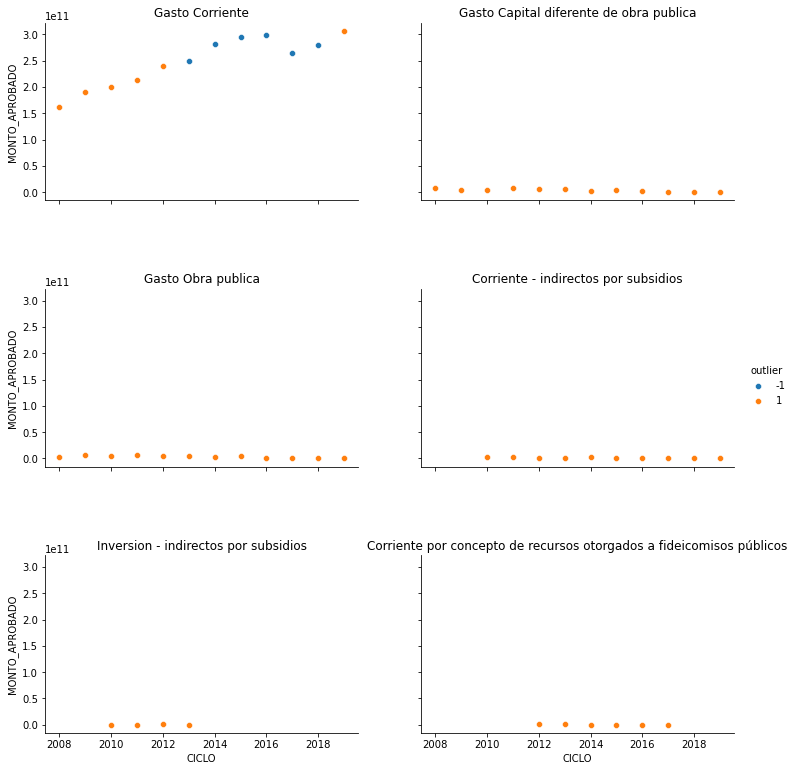

In [185]:
g = sns.FacetGrid(df_presupuesto_educacion_ciclo_tidy, col="DESC_TIPOGASTO", hue="outlier", col_wrap=2, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="CICLO", y="MONTO_APROBADO")
g.figure.set_size_inches(11, 11)
g.figure.subplots_adjust(wspace=.2, hspace=.5)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Gasto Corriente")
axes[1].set_title("Gasto Capital diferente de obra publica")
axes[2].set_title("Gasto Obra publica")
axes[3].set_title("Corriente - indirectos por subsidios")
axes[4].set_title("Inversion - indirectos por subsidios")
axes[5].set_title("Corriente por concepto de recursos otorgados a fideicomisos públicos")

Vemos que el algoritmo indica un anomalia de la tendencia que tenia el gasto corriente de la nacion aproximandamente en el periodo de 2013 - 2018, pudiendo ser un tema para investigacion a fondo sobre este periodo.

### Grabando los datos tidy 
grabamos los formatos en csv en la carpeta tidy_data con los nombres:
- presupuesto_tidy.csv
- educacion_tidy.csv

In [186]:
df_presupuesto_educacion_ciclo_tidy.drop(['outlier'],axis=1, inplace=True)
#exportando datos educacion
path = './tidy_data/'
path_educacion_tidy ='educacion_tidy.csv'
path_resupuesto_tidy = 'presupuesto_tidy.csv'
#exportando datos educacion
df_educacion_mexico_2008_2019_Main.to_csv(path+path_educacion_tidy, index = False)
#exportando datos presupuesto
df_presupuesto_educacion_ciclo_tidy.to_csv(path+path_resupuesto_tidy, index = False)